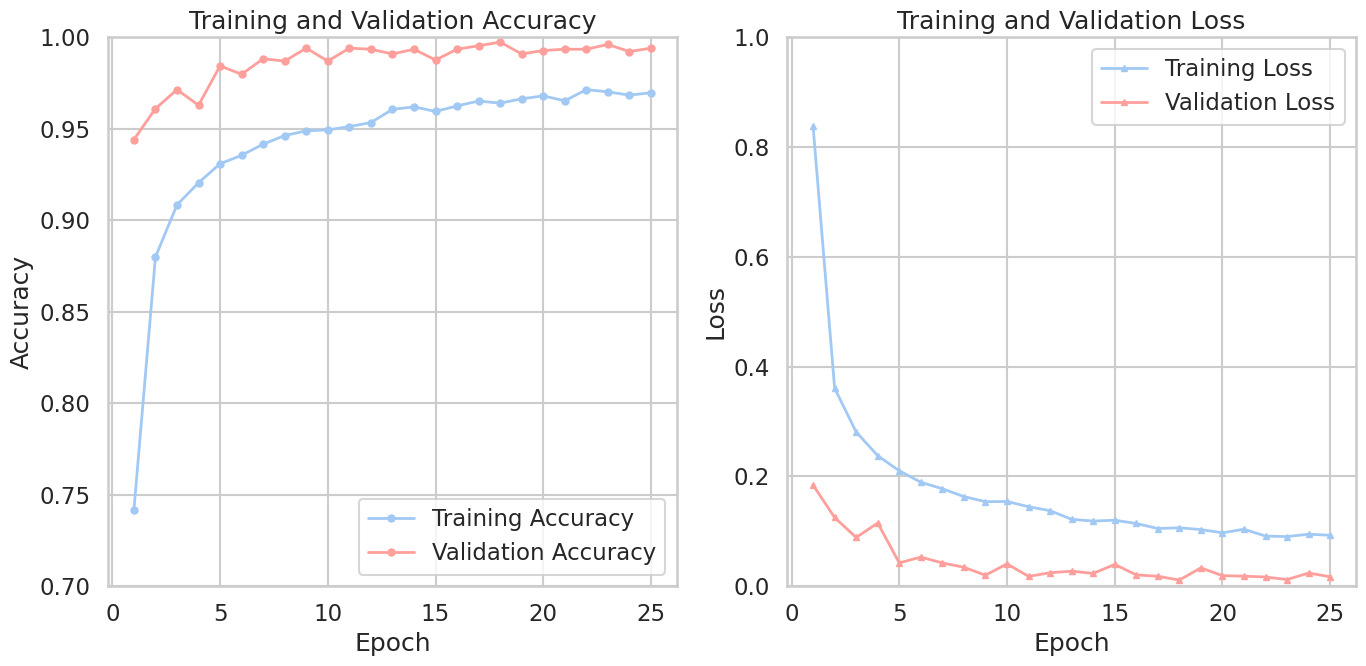

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", context="talk")

# Dane z poprzedniej wiadomości
epochs = list(range(1, 26))  # 25 epok

# Dokładność
train_acc = [0.7415, 0.8799, 0.9084, 0.9205, 0.9309, 0.9355, 0.9416, 0.9463, 0.9489, 0.9494, 0.9512, 0.9534, 0.9606, 0.9620, 0.9595, 0.9625, 0.9652, 0.9640, 0.9664, 0.9680, 0.9653, 0.9714, 0.9702, 0.9684, 0.9697]
val_acc = [0.9441, 0.9610, 0.9714, 0.9629, 0.9844, 0.9798, 0.9883, 0.9870, 0.9941, 0.9870, 0.9941, 0.9935, 0.9909, 0.9935, 0.9876, 0.9935, 0.9954, 0.9974, 0.9909, 0.9928, 0.9935, 0.9935, 0.9961, 0.9922, 0.9941]

# Straty
train_loss = [0.8377, 0.3606, 0.2808, 0.2376, 0.2101, 0.1892, 0.1774, 0.1631, 0.1538, 0.1542, 0.1446, 0.1374, 0.1216, 0.1185, 0.1200, 0.1141, 0.1049, 0.1062, 0.1030, 0.0971, 0.1036, 0.0911, 0.0902, 0.0945, 0.0925]
val_loss = [0.1839, 0.1250, 0.0886, 0.1149, 0.0423, 0.0528, 0.0422, 0.0343, 0.0198, 0.0405, 0.0177, 0.0243, 0.0272, 0.0231, 0.0395, 0.0204, 0.0179, 0.0110, 0.0332, 0.0190, 0.0181, 0.0165, 0.0119, 0.0238, 0.0170]

# Ustawienia stylów dla wykresów
#plt.style.use('seaborn-darkgrid')  # Styl tła i siatki

# Tworzenie wykresów
plt.figure(figsize=(14, 7))

# Wykres dokładności
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy', linewidth=2, markersize=5)
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy', linewidth=2, markersize=5)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim([0.7, 1.0])  # Zakres osi y

# Wykres strat
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b^-', label='Training Loss', linewidth=2, markersize=5)
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss', linewidth=2, markersize=5)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim([0, 1])  # Zakres osi y, dostosuj w razie potrzeby

plt.tight_layout()
plt.show()


In [2]:
import torch
import torchvision.models as models


num_classes = 15

model = models.resnet34(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


/home/artur_176/CNN/CNN/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/artur_176/CNN/CNN/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from data.augment_data import setup_data_loaders
from data.augment_data import setup_data_loaders
from torchvision import transforms
from data.augment_data import setup_transform

#base_path = "/home/artur_176/CNN/CNN/datasets/processed"


#train_loader, val_loader, test_loader = setup_data_loaders(base_path)

test_data_path = '/home/artur_176/CNN/CNN/datasets/processed/test'
test_dataset = ImageFolder(root=test_data_path, transform=setup_transform())
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)


In [4]:
correct_cases = []
incorrect_cases = []
sum_cases = 0

for images, labels in test_loader:
    original_images = images.clone()
    images, labels = images.to(device), labels.to(device)
    
    with torch.no_grad():
        outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    
    for i in range(images.size(0)):
        sum_cases += 1
        if predicted[i] == labels[i]:
            correct_cases.append((images[i], original_images[i], labels[i], predicted[i]))
        else:
            incorrect_cases.append((images[i], original_images[i], labels[i], predicted[i]))

print(f"Accuracy: {len(correct_cases) / sum_cases:.6f}")



Accuracy: 0.995521


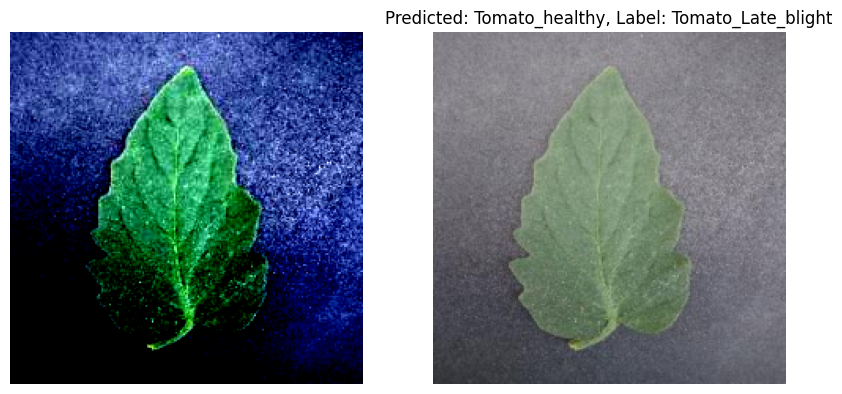

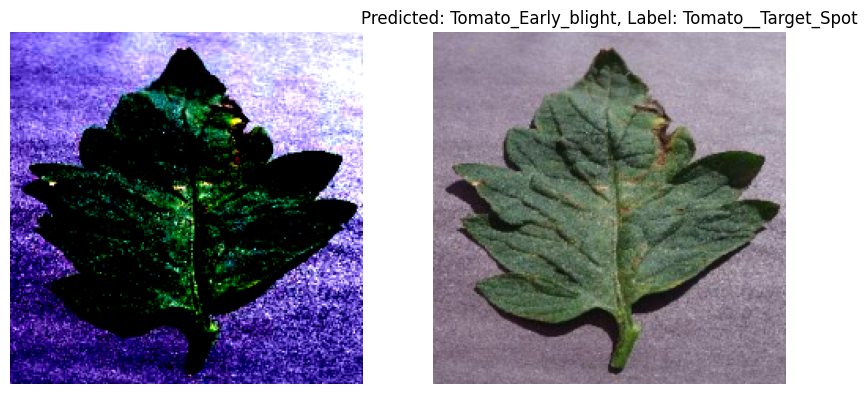

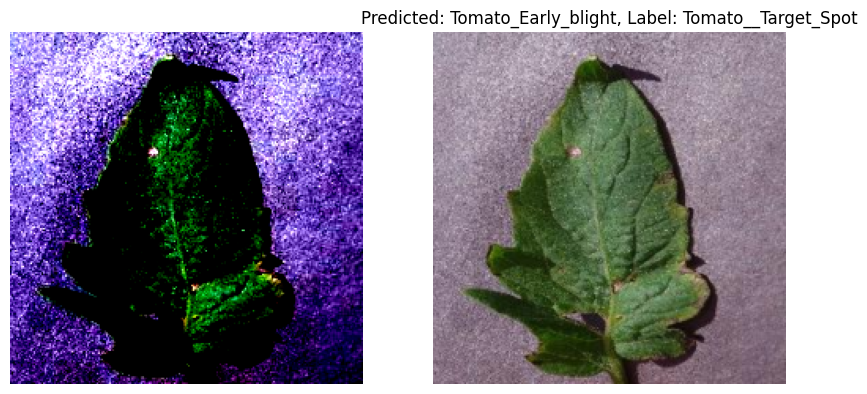

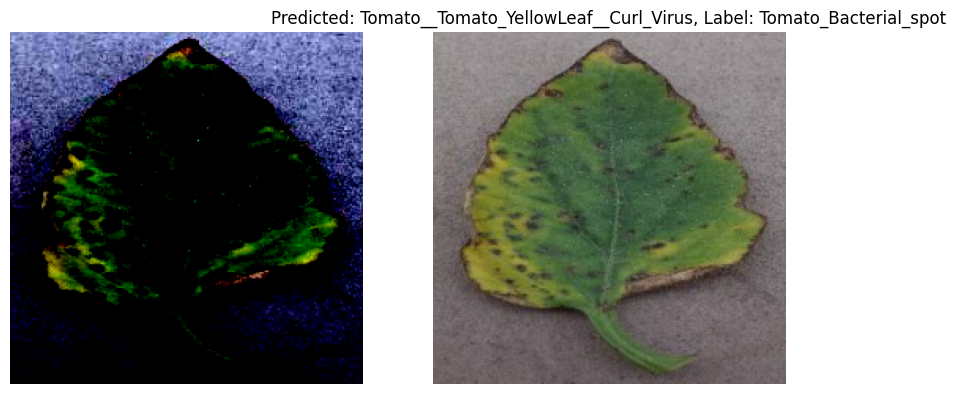

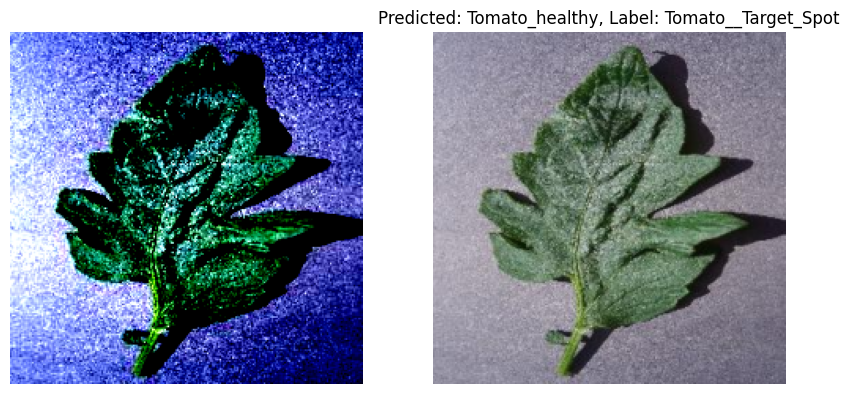

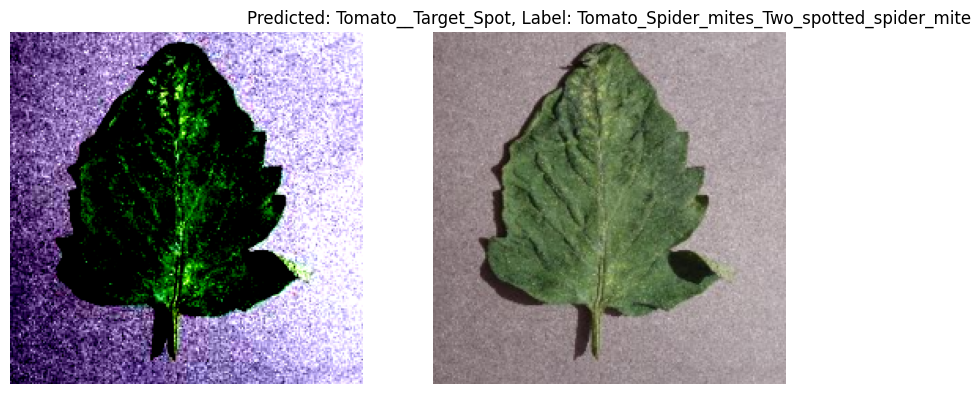

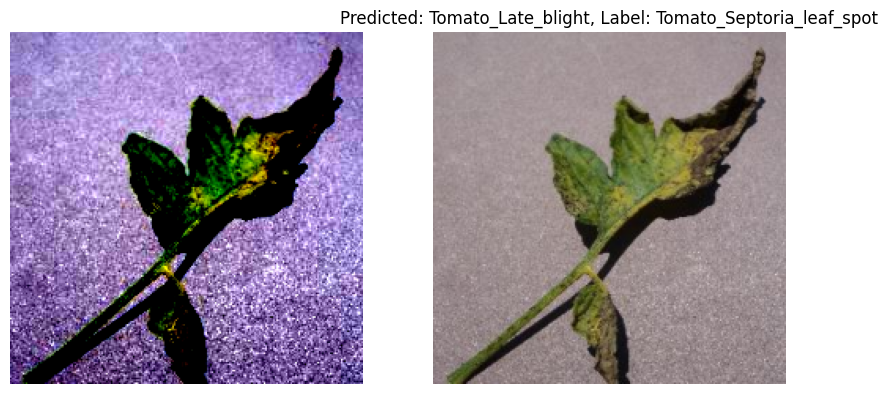

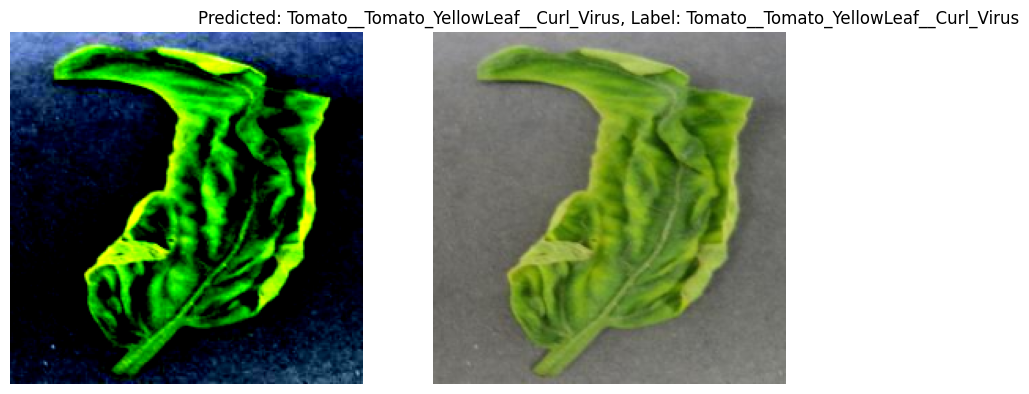

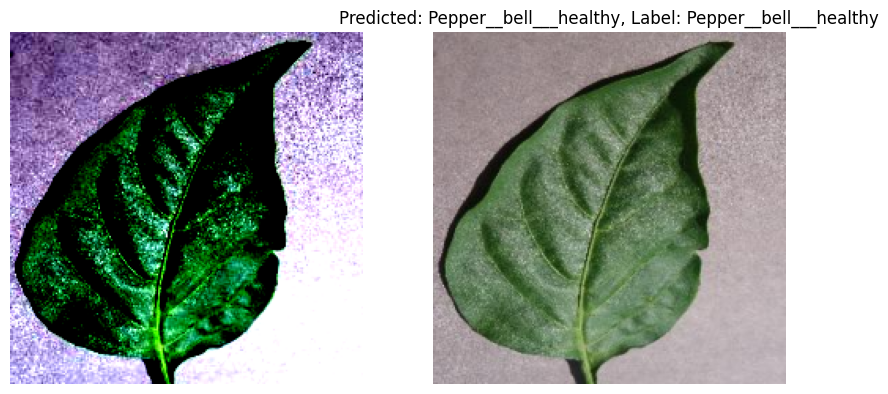

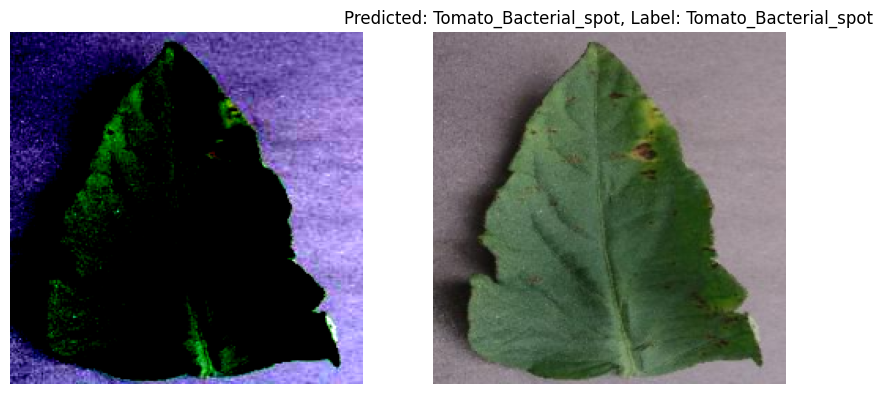

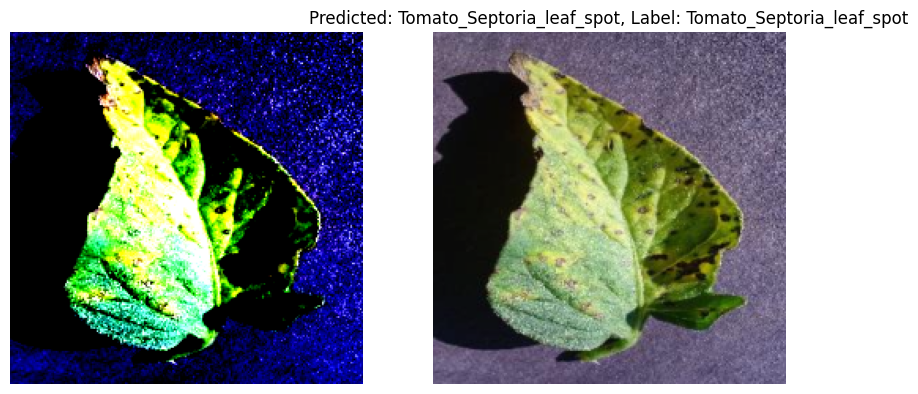

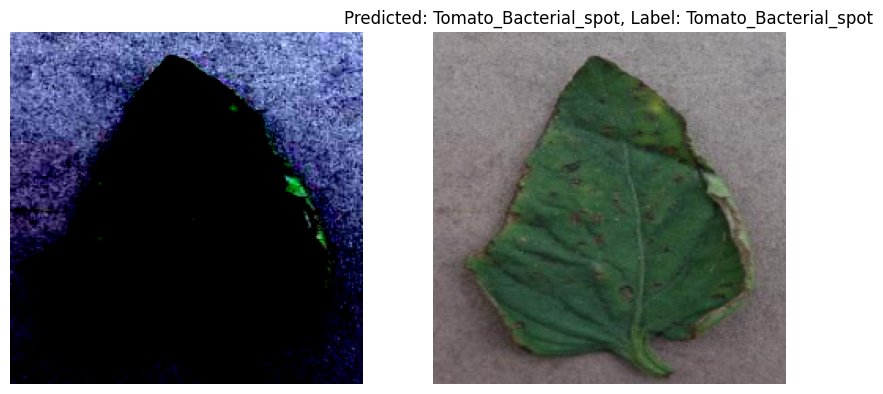

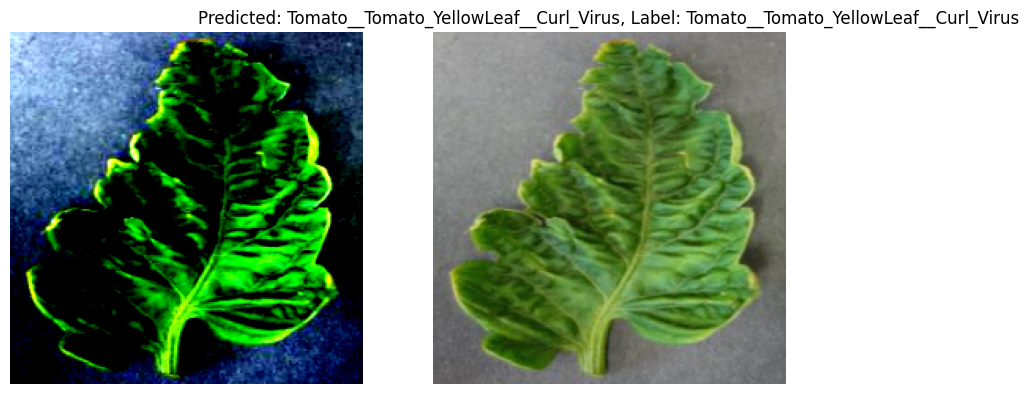

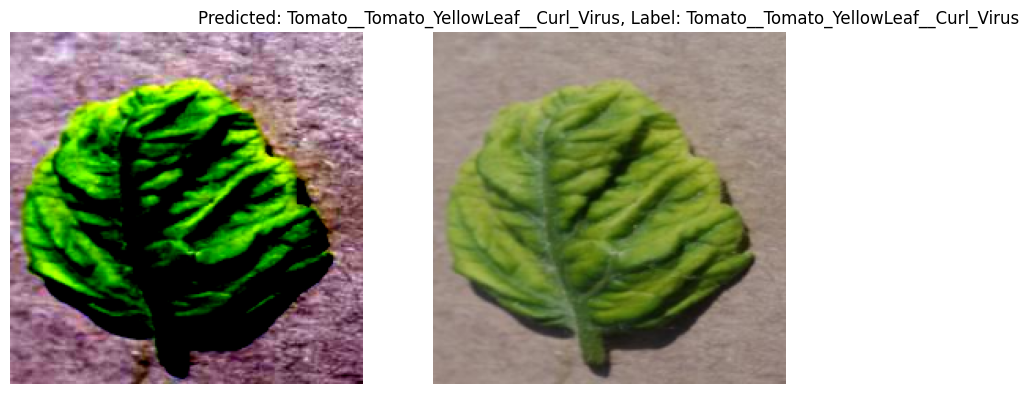

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import random

def imshow(transformed_img, original_img, predicted_label, true_label):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    original_img = original_img.numpy().transpose((1, 2, 0))
    original_img = np.clip(original_img, 0, 1)

    transformed_img = transformed_img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    transformed_img = std * transformed_img + mean
    transformed_img = np.clip(transformed_img, 0, 1)
    
    axs[0].imshow(original_img)
    axs[0].axis('off')
    
    axs[1].imshow(transformed_img)
    axs[1].set_title(f'Predicted: {predicted_label}, Label: {true_label}')
    axs[1].axis('off')
    
    plt.show()

for transformed_img, original_img, label, pred in incorrect_cases[:]:
    imshow(transformed_img.cpu(), original_img.cpu(), test_loader.dataset.classes[pred], test_loader.dataset.classes[label])

displayed_cases = random.sample(correct_cases, 7)
for transformed_img, original_img, label, pred in displayed_cases:
    imshow(transformed_img.cpu(), original_img.cpu(), test_loader.dataset.classes[pred], test_loader.dataset.classes[label])
